In [16]:
# Loading necessary libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('TUANDROMD.csv')

In [18]:
data.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [19]:
# check NA values
data.isnull().sum()

ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Label                                                       1
Length: 242, dtype: int64

In [22]:
# drop na values
data = data.dropna()
# get label and features
Y = data['Label']
# transform the label to binary 0 and 1
Y = Y.map({'malware':0, 'goodware':1})
X = data.drop(['Label'], axis=1)
# split data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=888)
# initialize the models
NaiveBayes = GaussianNB()
RandomForest = RandomForestClassifier()
SVM = SVC()
# train the models
NaiveBayes.fit(X_train, Y_train)
RandomForest.fit(X_train, Y_train)
SVM.fit(X_train, Y_train)

SVC()

In [39]:
# collect result
Y_pred_NB = NaiveBayes.predict(X_test)
Y_pred_RF = RandomForest.predict(X_test)
Y_pred_SVM = SVM.predict(X_test)
# calculate the accuracy
accuracy_NB = accuracy_score(Y_test, Y_pred_NB)
accuracy_RF = accuracy_score(Y_test, Y_pred_RF)
accuracy_SVM = accuracy_score(Y_test, Y_pred_SVM)
# calculate the precision
precision_NB = precision_score(Y_test, Y_pred_NB)
precision_RF = precision_score(Y_test, Y_pred_RF)
precision_SVM = precision_score(Y_test, Y_pred_SVM)
# calculate the recall
recall_NB = recall_score(Y_test, Y_pred_NB)
recall_RF = recall_score(Y_test, Y_pred_RF)
recall_SVM = recall_score(Y_test, Y_pred_SVM)
# print all restuls
print('Naive Bayes')
print('Accuracy:', accuracy_NB)
print('Precision:', precision_NB)
print('Recall:', recall_NB)
print('Random Forest')
print('Accuracy:', accuracy_RF)
print('Precision:', precision_RF)
print('Recall:', recall_RF)
print('SVM')
print('Accuracy:', accuracy_SVM)
print('Precision:', precision_SVM)
print('Recall:', recall_SVM)

Naive Bayes
Accuracy: 0.23852183650615902
Precision: 0.19477434679334918
Recall: 0.9879518072289156
Random Forest
Accuracy: 0.9977603583426652
Precision: 0.9880952380952381
Recall: 1.0
SVM
Accuracy: 0.9899216125419933
Precision: 0.9485714285714286
Recall: 1.0


C:\Users\wjzhao\AppData\Local\Temp\ipykernel_29972\2509268231.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(classifier_names)
C:\Users\wjzhao\AppData\Local\Temp\ipykernel_29972\2509268231.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(classifier_names)
C:\Users\wjzhao\AppData\Local\Temp\ipykernel_29972\2509268231.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(classifier_names)


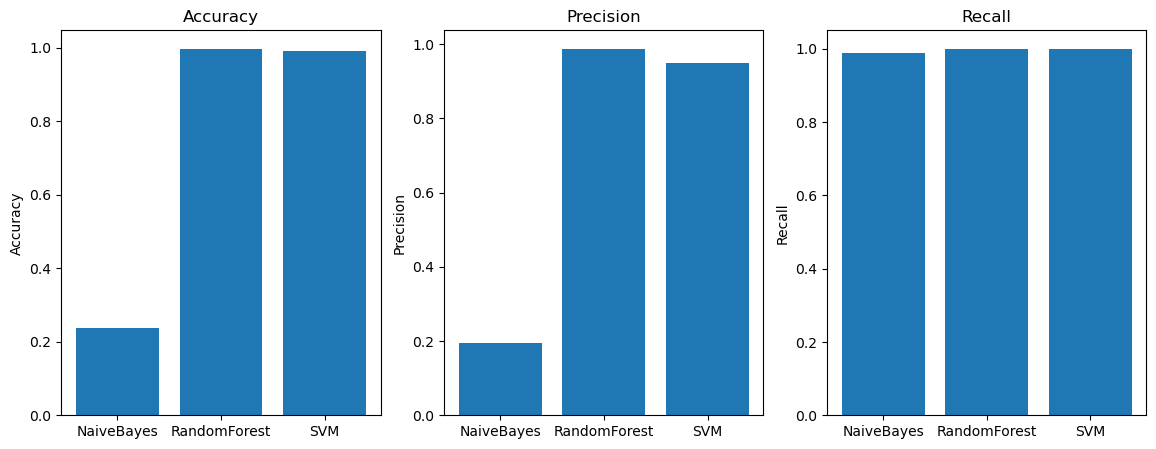

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
classifier_names = ['NaiveBayes', 'RandomForest', 'SVM']
axs[0].bar(['NaiveBayes', 'RandomForest', 'SVM'], [accuracy_NB, accuracy_RF, accuracy_SVM])
axs[0].set_title('Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticklabels(classifier_names)
axs[1].bar(['NaiveBayes', 'RandomForest', 'SVM'], [precision_NB, precision_RF, precision_SVM])
axs[1].set_title('Precision')
axs[1].set_ylabel('Precision')
axs[1].set_xticklabels(classifier_names)
axs[2].bar(['NaiveBayes', 'RandomForest', 'SVM'], [recall_NB, recall_RF, recall_SVM])
axs[2].set_title('Recall')
axs[2].set_ylabel('Recall')
axs[2].set_xticklabels(classifier_names)
plt.show()

In [41]:
# use PCA for naive bayes
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
NaiveBayes.fit(X_train_pca, Y_train)
Y_pred_NB_pca = NaiveBayes.predict(X_test_pca)
accuracy_NB_pca = accuracy_score(Y_test, Y_pred_NB_pca)
recall_NB_pca = recall_score(Y_test, Y_pred_NB_pca)
precision_NB_pca = precision_score(Y_test, Y_pred_NB_pca)
print('Accuracy of NaiveBayes with PCA: ', accuracy_NB_pca)
print('Recall of NaiveBayes with PCA: ', recall_NB_pca)
print('Precision of NaiveBayes with PCA: ', precision_NB_pca)

Accuracy of NaiveBayes with PCA:  0.9529675251959686
Recall of NaiveBayes with PCA:  0.9457831325301205
Precision of NaiveBayes with PCA:  0.8263157894736842


C:\Users\wjzhao\AppData\Local\Temp\ipykernel_29972\3347547972.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(classifier_names)
C:\Users\wjzhao\AppData\Local\Temp\ipykernel_29972\3347547972.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(classifier_names)
C:\Users\wjzhao\AppData\Local\Temp\ipykernel_29972\3347547972.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(classifier_names)


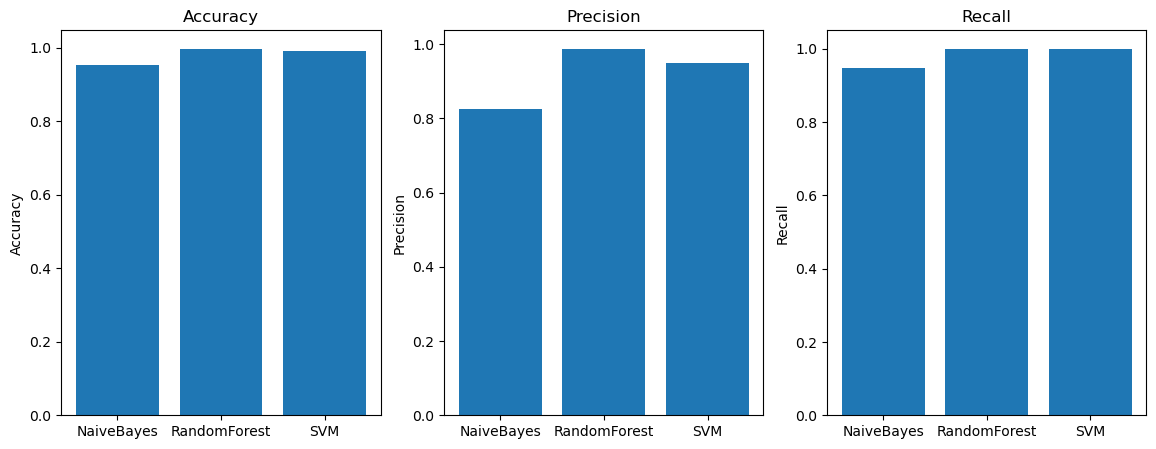

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
classifier_names = ['NaiveBayes', 'RandomForest', 'SVM']
axs[0].bar(['NaiveBayes', 'RandomForest', 'SVM'], [accuracy_NB_pca, accuracy_RF, accuracy_SVM])
axs[0].set_title('Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticklabels(classifier_names)
axs[1].bar(['NaiveBayes', 'RandomForest', 'SVM'], [precision_NB_pca, precision_RF, precision_SVM])
axs[1].set_title('Precision')
axs[1].set_ylabel('Precision')
axs[1].set_xticklabels(classifier_names)
axs[2].bar(['NaiveBayes', 'RandomForest', 'SVM'], [recall_NB_pca, recall_RF, recall_SVM])
axs[2].set_title('Recall')
axs[2].set_ylabel('Recall')
axs[2].set_xticklabels(classifier_names)
plt.show()